# Session 4: Creating a Simple Machine Learning Model
In this notebook, we'll create a simple linear model from scratch, train it using a custom loss function, and optimize it using gradient descent.

If you are unfamiliar with classes or Object-Oriented Programming (OOP) in Python, consider learning that first. We'll be using a simple class structure to define our model.

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt

### Defining Input and Target Output
We'll use a basic linear relationship where the output is simply twice the input:

In [2]:
inp = [1, 2, 3, 4]
out = [2, 4, 6, 8]  # Target output, which is 2x the input

### Building the Simple Linear Model
Here we define a class for our model. The model has a parameter `x` that it uses to predict the output based on the input.
Initially, `x` is set to an arbitrary value.

In [3]:
class SimpleLinearModel:
    def __init__(self):
        """
        Initialize the model with an initial parameter.
        This parameter (x) represents the model's weight, which we will optimize.
        """
        self.x = -100  # Starting value, this can be any arbitrary number.

    def __call__(self, inp):
        """
        Make predictions based on the input and the current model parameter.

        Args:
        inp (list): A list of input values.

        Returns:
        list: Predicted values.
        """
        return [i * self.x for i in inp]

### Defining the Loss Function
We'll use Mean Squared Error (MSE) as our loss function. It measures how close the model's predictions are to the actual target values.

In [4]:
def compute_loss(pred, out):
    """
    Compute the mean squared error between the predicted values and the actual target values.

    Args:
    pred (list): The model's predictions.
    out (list): The true target values.

    Returns:
    float: The computed loss value.
    """
    return sum((p - o) ** 2 for p, o in zip(pred, out)) / len(pred)

### Calculating the Gradient
We calculate the gradient (derivative) of the loss function with respect to the model parameter `x`. This tells us how to update `x` to reduce the loss.

In [5]:
def compute_gradient(pred, out, inp):
    """
    Compute the gradient of the loss function, used for updating the model parameter.

    Args:
    pred (list): The model's predictions.
    out (list): The true target values.
    inp (list): The input values.

    Returns:
    float: The gradient value for the model parameter (x).
    """
    return -2 * sum((o - p) * i for p, o, i in zip(pred, out, inp)) / len(pred)

### Training the Model using Gradient Descent
We now create an instance of our model and train it using gradient descent. We'll run multiple iterations and adjust the model's parameter `x` to minimize the loss.

In [6]:
# Creating an instance of the model
model = SimpleLinearModel()

# Training loop
iterations = 10
learning_rate = 0.1  # Controls how much we adjust x in each step

losses = []  # To track loss values for visualization

for i in range(iterations):
    # Get model predictions
    pred = model(inp)

    # Compute the loss
    loss = compute_loss(pred, out)
    losses.append(loss)

    # Compute the gradient
    grad = compute_gradient(pred, out, inp)

    # Update the model parameter (x) using the gradient
    model.x -= learning_rate * grad

    # Print the current loss and model parameter
    print(f"Iteration {i + 1}: Loss = {loss:.4f}, x = {model.x:.4f}")

Iteration 1: Loss = 78030.0000, x = 53.0000
Iteration 2: Loss = 19507.5000, x = -23.5000
Iteration 3: Loss = 4876.8750, x = 14.7500
Iteration 4: Loss = 1219.2188, x = -4.3750
Iteration 5: Loss = 304.8047, x = 5.1875
Iteration 6: Loss = 76.2012, x = 0.4062
Iteration 7: Loss = 19.0503, x = 2.7969
Iteration 8: Loss = 4.7626, x = 1.6016
Iteration 9: Loss = 1.1906, x = 2.1992
Iteration 10: Loss = 0.2977, x = 1.9004


### Visualizing the Loss over Iterations
We can plot the loss values to see how the model improves over time.

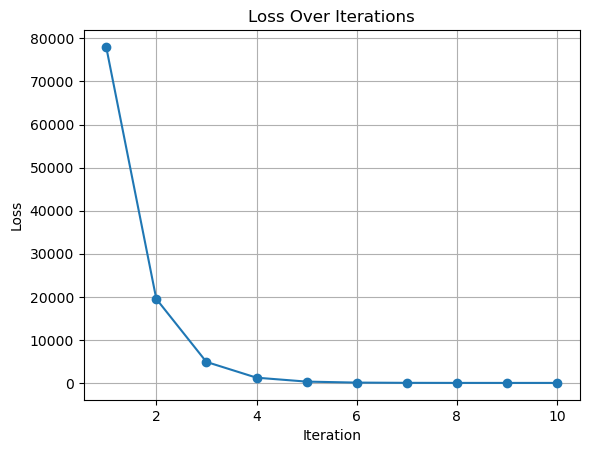

Final value of x: 1.9004


In [7]:
plt.plot(range(1, iterations + 1), losses, marker='o')
plt.title('Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Final model parameter (x)
print(f"Final value of x: {model.x:.4f}")